In [3]:
# Importing the necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, svm, ensemble, datasets, model_selection

In [2]:
# Importing the dataset

dataset = datasets.load_digits()
print(dir(dataset))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


<Figure size 432x288 with 0 Axes>

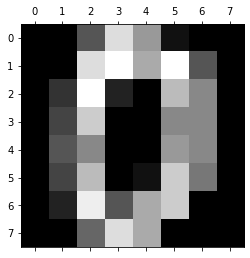

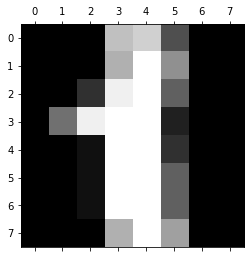

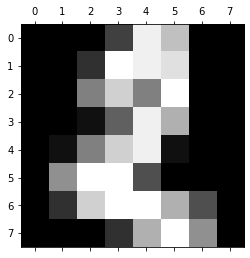

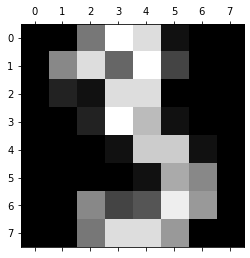

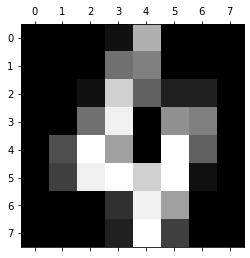

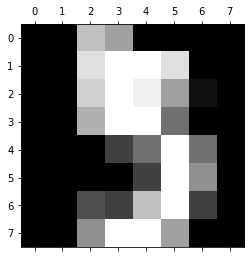

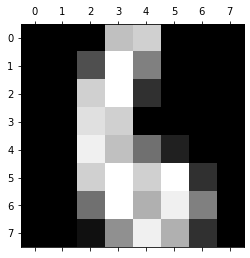

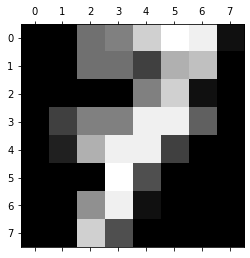

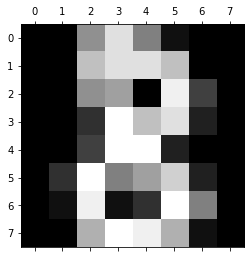

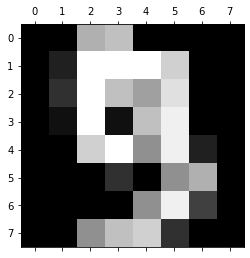

In [5]:
# Visualizing the digits

for x in dataset.images[:10]:
    plt.gray()
    plt.matshow(x)
plt.show()

In [6]:
# Creating a dataframe from the dataset

df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df['target'] = dataset.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [15]:
# Performing 'k' fold cross validation

X = df.drop('target', axis = 1).values
y = df['target']

lg = linear_model.LogisticRegression()
svm_ = svm.SVC()
rf = ensemble.RandomForestClassifier()

def train_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

lg_scores, svm_scores, rf_scores = [], [], []

kf = model_selection.StratifiedKFold(n_splits = 10)

for train_index, test_index in kf.split(X, y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    lg_scores.append(train_model(lg, X_train, X_test, y_train, y_test))
    svm_scores.append(train_model(svm_, X_train, X_test, y_train, y_test))
    rf_scores.append(train_model(rf, X_train, X_test, y_train, y_test))

C:\Users\meesa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\meesa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [16]:
def avg(li):
    return sum(li) / len(li)

print(avg(lg_scores), avg(svm_scores), avg(rf_scores))

0.9281936685288642 0.9699503414028554 0.9499037864680322


In [26]:
print(avg(model_selection.cross_val_score(svm.SVC(), X, y)))
print(avg(model_selection.cross_val_score(ensemble.RandomForestClassifier(n_estimators = 100), X, y)))

0.9632838130609718
0.9360182606004332


In [49]:
# Tuning hyper-parameters using 'GridSearchCV'

param_grid = {
    'C' : [4, 5],
    'kernel' : ['rbf', 'linear', 'poly'],
    'degree' : [0, 1]
}

classifier = model_selection.GridSearchCV(svm.SVC(), param_grid, cv = 10)

classifier.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [4, 5], 'degree': [0, 1],
                         'kernel': ['rbf', 'linear', 'poly']})

In [50]:
print(classifier.best_score_)
print(classifier.best_params_)

0.9821818746120423
{'C': 5, 'degree': 0, 'kernel': 'rbf'}


In [51]:
new_df = pd.DataFrame(classifier.cv_results_)
new_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.082661,0.006286,0.028251,0.006310,4,0,rbf,"{'C': 4, 'degree': 0, 'kernel': 'rbf'}",0.972222,1.000000,...,0.988889,0.994444,0.988889,1.000000,0.994413,0.966480,0.966480,0.981071,0.018652,3
1,0.054926,0.009494,0.005350,0.007145,4,0,linear,"{'C': 4, 'degree': 0, 'kernel': 'linear'}",0.938889,0.994444,...,0.944444,0.961111,0.988889,0.966667,0.977654,0.932961,0.966480,0.960487,0.021326,5
2,0.301318,0.012116,0.022898,0.007033,4,0,poly,"{'C': 4, 'degree': 0, 'kernel': 'poly'}",0.100000,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.100559,0.100559,0.100559,0.100168,0.000256,11
3,0.080360,0.006217,0.031062,0.004081,4,1,rbf,"{'C': 4, 'degree': 1, 'kernel': 'rbf'}",0.972222,1.000000,...,0.988889,0.994444,0.988889,1.000000,0.994413,0.966480,0.966480,0.981071,0.018652,3
4,0.060874,0.008495,0.004016,0.004991,4,1,linear,"{'C': 4, 'degree': 1, 'kernel': 'linear'}",0.938889,0.994444,...,0.944444,0.961111,0.988889,0.966667,0.977654,0.932961,0.966480,0.960487,0.021326,5


In [60]:
# Tuning hyper-parameters for random forest

param_grid = {
    'criterion' : ['gini', 'log_loss'],
    'n_estimators' : [100, 200],
}

classifier = model_selection.GridSearchCV(ensemble.RandomForestClassifier(), param_grid, cv = 10)

classifier.fit(X, y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'log_loss'],
                         'n_estimators': [100, 200]})

In [61]:
print(classifier.best_score_)
print(classifier.best_params_)

0.9526908752327745
{'criterion': 'log_loss', 'n_estimators': 100}


In [ ]:
new_df = pd.DataFrame(classifier.cv_results_)
new_df.head()

In [65]:
# Tuning hyper-paramters using 'RandomizedSearchCV'

param_grid = {
    'criterion' : ['gini', 'log_loss', 'entropy'],
    'n_estimators' : [10, 50, 100, 200],
    'bootstrap' : [True, False]
}

classifier = model_selection.RandomizedSearchCV(ensemble.RandomForestClassifier(), param_grid, cv = 10, n_iter = 2)

classifier.fit(X, y)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=2,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'log_loss',
                                                      'entropy'],
                                        'n_estimators': [10, 50, 100, 200]})

In [67]:
print(classifier.best_score_)
print(classifier.best_params_)

0.9549286157666046
{'n_estimators': 200, 'criterion': 'entropy', 'bootstrap': False}


In [85]:
# Building the best model

model = svm.SVC(kernel = 'rbf', degree = 0, gamma = 'scale')

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

model.fit(X_train, y_train)

SVC(degree=0)

In [87]:
print(model.score(X_test, y_test))

0.9944444444444445
